# SILVIA INDRA MAULINA
# 20.11.3332
# 20-S1IF-01

In [ ]:
# import library yang diperlukan 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# membaca dataset
nsfg = pd.read_hdf('nsfg.hdf5' , 'nsfg')

In [ ]:
# melihat ukuran dataset
nsfg.shape

(9358, 10)

In [ ]:
# melihat nama kolom dataset
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [ ]:
# melihat 5 kata data teratas
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [ ]:
# label outcomes
# 1 : live birth
# 2 : iduced abortion
# 3 : stillbirth
# 4 : misscarriage
# 5 : ecotoppic pregnancy
# 6 : current pregnancy

# berapakah jumlah kelahiran yang normal/selamat
nsfg['outcome'].value_counts()

1    6489
4    1469
2     947
6     249
5     118
3      86
Name: outcome, dtype: int64

In [ ]:
oc_all = nsfg['outcome'].count()

In [ ]:
oc_lb = nsfg[nsfg['outcome']==1] ['outcome'].count()

In [ ]:
lb_percent = oc_lb/oc_all * 100

In [ ]:
lb_percent

69.34173968796752

In [ ]:
# membuat fungsi untuk menghitung presentase outcome berdasarkan label
def outcome_percentage(oc) :
  oc_all = nsfg['outcome'].count()
  oc_lb = nsfg[nsfg['outcome']==oc] ['outcome'].count()
  lb_percent = oc_lb/oc_all * 100
  return lb_percent

In [ ]:
outcome_percentage(2)

10.119683693096816

In [ ]:
outcome_percentage(3)

0.9189997862791195

In [ ]:
outcome_percentage(4)

15.69779867493054

In [ ]:
# melihat prosentase keseluruhan outcome
for i in range (7):
  if i>0:
    print('outcome label-',i, "=" , outcome_percentage(i))

outcome label- 1 = 69.34173968796752
outcome label- 2 = 10.119683693096816
outcome label- 3 = 0.9189997862791195
outcome label- 4 = 15.69779867493054
outcome label- 5 = 1.260953195127164
outcome label- 6 = 2.660824962598846


In [ ]:
# melihat jumlah data pada kolom "nbrnaliv"
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [ ]:
# clean data nbrnaliv == 8
nsfg ['nbrnaliv'].replace([8], np.nan, inplace = True)

In [ ]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

Usia kehamilan Untuk setiap kehamilan dalam dataset NSFG, variabel 'agecon' mengkodekan usia responden saat awal kehamilan, dan 'agepreg' usia responden pada akhir kehamilan.
Kedua variabel dicatat sebagai bilangan bulat dengan dua tempat desimal implisit, sehingga nilai 2575 berarti usia responden adalah 25,75.

# 1. Buat variabel baru yaitu: agecon dan agepreg. Simpan usia responden pada kedua variabel terebut (sesuai petunjuk diatas)

In [ ]:
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

In [ ]:
# Hasil setelah perhitungan
print (agecon)

0       20.00
1       22.91
2       32.41
3       36.50
4       21.91
        ...  
9353    17.58
9354    17.41
9355    20.91
9356    34.50
9357    36.83
Name: agecon, Length: 9358, dtype: float64


In [ ]:
print (agepreg)

0       20.75
1       23.58
2       33.08
3         NaN
4       22.66
        ...  
9353    18.25
9354    18.16
9355    21.58
9356    35.25
9357    37.58
Name: agepreg, Length: 9358, dtype: float64


# 2. Hitung selisihnya, yang merupakan perkiraan durasi kehamilan. Perlu diingat bahwa untuk setiap kehamilan, agepreg akan lebih besar dari agecon.

In [ ]:
preg_length = agepreg - agecon

In [ ]:
# Hasil setelah perhitungan
print (preg_length)

0       0.75
1       0.67
2       0.67
3        NaN
4       0.75
        ... 
9353    0.67
9354    0.75
9355    0.67
9356    0.75
9357    0.75
Length: 9358, dtype: float64


# 3. Buat kolom baru di dataframe nsfg dengan nama "preglength" sesuai dengan perhitungan selisih pada soal nomer 2

In [ ]:
nsfg ['preg_length'] = preg_length
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015,preg_length
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843,0.75
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843,0.67
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843,0.67
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358,NaN
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914,0.75


# 4. Buatlah grafik untuk menampilkan 2 variabel, yaitu jumlah kehamilan dan agecon. Gunakan bins = 20 untuk mempermudah pengelompokan.

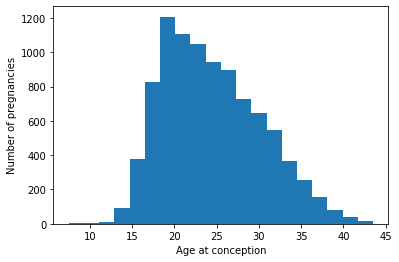

In [ ]:
plt.hist(agecon, bins=20)
# Label sumbu
plt.xlabel("Age at conception")
plt.ylabel('Number of pregnancies')
plt.show()

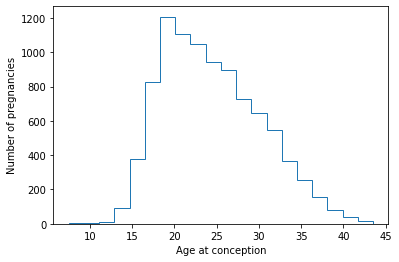

In [ ]:
plt.hist(agecon, bins=20, histtype = 'step')
plt.xlabel("Age at conception")
plt.ylabel('Number of pregnancies')
plt.show()

# 5. Hitung jumlah kehamilan dengan rule:
#            1. Jumlah bayi = 1
#            2. Lama kehamilan lebih dari atau 37 minggu

In [ ]:
# Buat series untuk informasi kehamilan >= 37
full_term = nsfg ['prglngth'] >= 37
print (full_term)

0        True
1       False
2       False
3       False
4        True
        ...  
9353    False
9354     True
9355    False
9356     True
9357     True
Name: prglngth, Length: 9358, dtype: bool


In [ ]:
# Buat series untuk jumlah bayi =1
# Perhatikan! kolom jumlah bayi sudah dibahas pada kode diatas
single = nsfg ['nbrnaliv'] == 1
print (single)

0        True
1        True
2        True
3       False
4        True
        ...  
9353     True
9354     True
9355     True
9356     True
9357     True
Name: nbrnaliv, Length: 9358, dtype: bool


In [ ]:
from numpy.ma.core import count
# Filter bayi single dg kelahiran normal (lahir hidup)
single_full_term = nsfg [full_term & single]['outcome']. count()
print('single full term : ' , single_full_term)

single full term :  5529
